<a href="https://colab.research.google.com/github/Tejas242/MNIST-expreriments/blob/main/Playing_with_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

11490434/11490434 [==============================] - 0s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


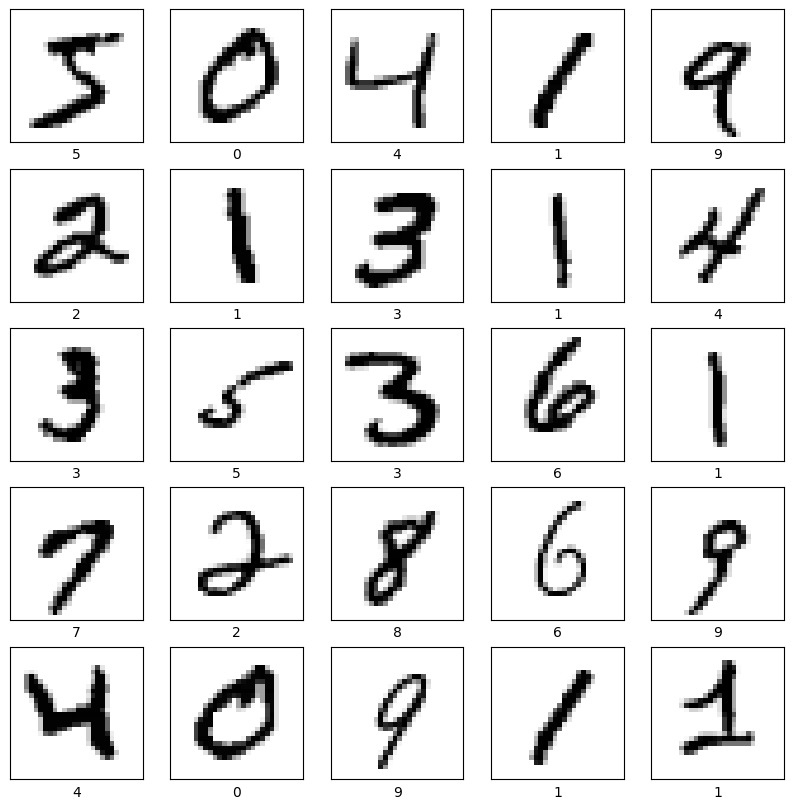

In [2]:
# Function to plot images
def plot_images(images, labels, num):
    plt.figure(figsize=(10, 10))
    for i in range(num):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(labels[i])
    plt.show()

# Plot 25 sample images
plot_images(x_train, y_train, 25)


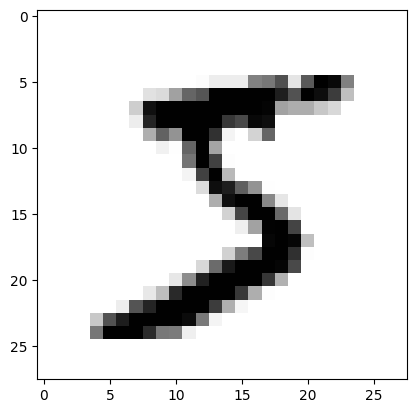

In [3]:
plt.imshow(x_train[0], cmap=plt.cm.binary)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the input from 28x28 to 784
    Dense(128, activation='relu'),  # Hidden layer with 128 neurons and ReLU activation
    Dense(10, activation='softmax')  # Output layer with 10 neurons (one for each class) and softmax activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()  # Print the model summary


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
# Train the model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2615 - accuracy: 0.9258 - val_loss: 0.1436 - val_accuracy: 0.9586
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1188 - accuracy: 0.9647 - val_loss: 0.1020 - val_accuracy: 0.9693
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0821 - accuracy: 0.9755 - val_loss: 0.1037 - val_accuracy: 0.9679
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0613 - accuracy: 0.9814 - val_loss: 0.0737 - val_accuracy: 0.9774
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0474 - accuracy: 0.9852 - val_loss: 0.0787 - val_accuracy: 0.9756


In [6]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model with early stopping
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), callbacks=[early_stopping])


Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0363 - accuracy: 0.9884 - val_loss: 0.0743 - val_accuracy: 0.9766
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0298 - accuracy: 0.9908 - val_loss: 0.0825 - val_accuracy: 0.9766
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0234 - accuracy: 0.9926 - val_loss: 0.0745 - val_accuracy: 0.9768
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0193 - accuracy: 0.9938 - val_loss: 0.0843 - val_accuracy: 0.9755


In [7]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 1s - loss: 0.0843 - accuracy: 0.9755 - 541ms/epoch - 2ms/step

Test accuracy: 0.9754999876022339


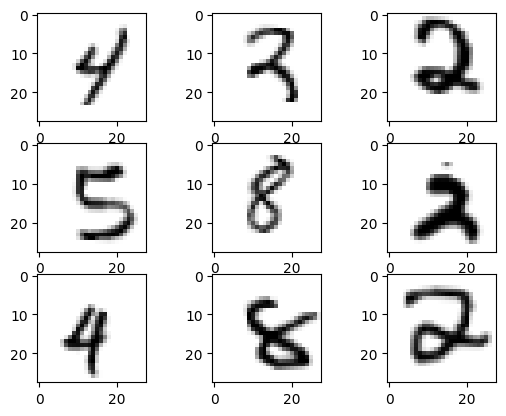

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Reshape the data to include the channel dimension
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)


# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,       # Randomly rotate images by 10 degrees
    width_shift_range=0.1,   # Randomly shift images horizontally by 10%
    height_shift_range=0.1,  # Randomly shift images vertically by 10%
    zoom_range=0.1           # Randomly zoom images by 10%
)

# Fit the generator to the training data
datagen.fit(x_train)

# Example of augmenting and visualizing images
for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(x_batch[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.show()
    break  # We just want to see one batch of augmented images


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

# Build a more complex model with the correct input shape
complex_model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(256, activation='relu'),
    Dropout(0.5),  # Add dropout to prevent overfitting
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
complex_model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

complex_model.summary()  # Print the model summary


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 10)               

In [10]:
# Train the model using the augmented data
history = complex_model.fit(datagen.flow(x_train, y_train, batch_size=32),
                            epochs=50,
                            validation_data=(x_test, y_test),
                            callbacks=[early_stopping])


Epoch 1/50
1875/1875 [==============================] - 29s 14ms/step - loss: 0.9033 - accuracy: 0.6990 - val_loss: 0.1971 - val_accuracy: 0.9455
Epoch 2/50
1875/1875 [==============================] - 25s 14ms/step - loss: 0.5145 - accuracy: 0.8405 - val_loss: 0.1384 - val_accuracy: 0.9575
Epoch 3/50
1875/1875 [==============================] - 25s 14ms/step - loss: 0.4372 - accuracy: 0.8676 - val_loss: 0.1437 - val_accuracy: 0.9566
Epoch 4/50
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3928 - accuracy: 0.8806 - val_loss: 0.1152 - val_accuracy: 0.9659
Epoch 5/50
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3708 - accuracy: 0.8867 - val_loss: 0.1030 - val_accuracy: 0.9683
Epoch 6/50
1875/1875 [==============================] - 25s 14ms/step - loss: 0.3496 - accuracy: 0.8950 - val_loss: 0.0970 - val_accuracy: 0.9713
Epoch 7/50
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3321 - accuracy: 0.8998 - val_loss: 0.1008 -

In [11]:
from tensorflow.keras.callbacks import TensorBoard
import datetime

# TensorBoard callback
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train the model with TensorBoard callback
history = complex_model.fit(datagen.flow(x_train, y_train, batch_size=32),
                            epochs=50,
                            validation_data=(x_test, y_test),
                            callbacks=[early_stopping, tensorboard_callback])


Epoch 1/50
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2651 - accuracy: 0.9207 - val_loss: 0.0820 - val_accuracy: 0.9738
Epoch 2/50
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2659 - accuracy: 0.9208 - val_loss: 0.0785 - val_accuracy: 0.9758
Epoch 3/50
1875/1875 [==============================] - 25s 14ms/step - loss: 0.2670 - accuracy: 0.9206 - val_loss: 0.0787 - val_accuracy: 0.9756
Epoch 4/50
1875/1875 [==============================] - 25s 14ms/step - loss: 0.2634 - accuracy: 0.9210 - val_loss: 0.0755 - val_accuracy: 0.9755
Epoch 5/50
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2605 - accuracy: 0.9231 - val_loss: 0.0741 - val_accuracy: 0.9766
Epoch 6/50
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2559 - accuracy: 0.9236 - val_loss: 0.0776 - val_accuracy: 0.9761
Epoch 7/50
1875/1875 [==============================] - 25s 14ms/step - loss: 0.2573 - accuracy: 0.9235 - val_loss: 0.0730 -

In [12]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

<IPython.core.display.Javascript object>

In [13]:
# Evaluate the complex model
test_loss, test_acc = complex_model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')


313/313 - 1s - loss: 0.0695 - accuracy: 0.9787 - 546ms/epoch - 2ms/step

Test accuracy: 0.9786999821662903


In [14]:
# Save the model
complex_model.save('mnist_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
# Load the model
from tensorflow.keras.models import load_model

loaded_model = load_model('mnist_model.h5')

# Evaluate the loaded model
test_loss, test_acc = loaded_model.evaluate(x_test, y_test, verbose=2)
print(f'\nLoaded model accuracy: {test_acc}')


313/313 - 1s - loss: 0.0695 - accuracy: 0.9787 - 1s/epoch - 4ms/step

Loaded model accuracy: 0.9786999821662903


313/313 [==============================] - 1s 4ms/step


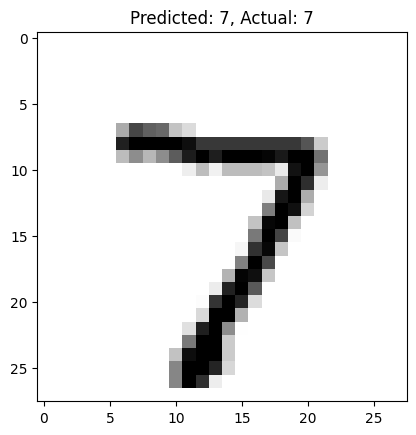

In [16]:
# Make predictions on the test set
predictions = loaded_model.predict(x_test)

# Example: Predict and display the first test image
plt.imshow(x_test[0].reshape(28, 28), cmap=plt.cm.binary)
plt.title(f'Predicted: {np.argmax(predictions[0])}, Actual: {y_test[0]}')
plt.show()


In [17]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Build a CNN model
cnn_model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

cnn_model.summary()  # Print the model summary


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [18]:
# Train the CNN model using the augmented data
history = cnn_model.fit(datagen.flow(x_train, y_train, batch_size=32),
                        epochs=50,
                        validation_data=(x_test, y_test),
                        callbacks=[early_stopping, tensorboard_callback])


Epoch 1/50
1875/1875 [==============================] - 30s 14ms/step - loss: 0.4012 - accuracy: 0.8725 - val_loss: 0.0459 - val_accuracy: 0.9852
Epoch 2/50
1875/1875 [==============================] - 25s 14ms/step - loss: 0.1640 - accuracy: 0.9507 - val_loss: 0.0346 - val_accuracy: 0.9888
Epoch 3/50
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1281 - accuracy: 0.9620 - val_loss: 0.0294 - val_accuracy: 0.9905
Epoch 4/50
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1043 - accuracy: 0.9689 - val_loss: 0.0350 - val_accuracy: 0.9875
Epoch 5/50
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0942 - accuracy: 0.9715 - val_loss: 0.0259 - val_accuracy: 0.9918
Epoch 6/50
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0864 - accuracy: 0.9747 - val_loss: 0.0197 - val_accuracy: 0.9929
Epoch 7/50
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0774 - accuracy: 0.9774 - val_loss: 0.0229 -

In [19]:
# Evaluate the CNN model
test_loss, test_acc = cnn_model.evaluate(x_test, y_test, verbose=2)
print(f'\nCNN model test accuracy: {test_acc}')


313/313 - 1s - loss: 0.0199 - accuracy: 0.9939 - 604ms/epoch - 2ms/step

CNN model test accuracy: 0.9939000010490417


**HP Tuning**

In [20]:
!pip install keras-tuner

from kerastuner import RandomSearch

def build_model(hp):
    model = Sequential()
    model.add(Conv2D(hp.Int('conv_1_filters', min_value=32, max_value=128, step=16),
                     kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(hp.Int('conv_2_filters', min_value=32, max_value=128, step=16),
                     kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(hp.Int('dense_units', min_value=64, max_value=256, step=32), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

tuner = RandomSearch(build_model,
                     objective='val_accuracy',
                     max_trials=5,
                     executions_per_trial=3,
                     directory='mnist_tuning',
                     project_name='mnist_cnn')

tuner.search(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()


Trial 5 Complete [00h 04m 09s]
val_accuracy: 0.993399977684021

Best val_accuracy So Far: 0.9938333431879679
Total elapsed time: 00h 24m 05s
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 48)        480       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 48)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 112)       48496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 112)         0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2800)      

**Transfer Learning**

In [22]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf

# Reshape the data to include the channel dimension and resize to 32x32
x_train_resized = tf.image.resize(x_train, [32, 32])
x_test_resized = tf.image.resize(x_test, [32, 32])

# Convert grayscale images to RGB by repeating the channel
x_train_resized = tf.image.grayscale_to_rgb(x_train_resized)
x_test_resized = tf.image.grayscale_to_rgb(x_test_resized)

# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

# Fit the generator to the training data
datagen.fit(x_train_resized)

# Load the VGG16 model, excluding the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add new top layers
transfer_model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Freeze the base model layers
base_model.trainable = False

# Compile the model
transfer_model.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

transfer_model.summary()  # Print the model summary

# Train the model
history = transfer_model.fit(datagen.flow(x_train_resized, y_train, batch_size=32),
                             epochs=10,
                             validation_data=(x_test_resized, y_test))


58889256/58889256 [==============================] - 1s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_2 (Dense)             (None, 128)               65664     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 14781642 (56.39 MB)
Trainable params: 669

**Fine-Tuning the Pre-Trained Model**

In [23]:
# Unfreeze the base model
base_model.trainable = True

# Re-compile the model with a lower learning rate
transfer_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

# Fine-tune the model
history_fine = transfer_model.fit(datagen.flow(x_train_resized, y_train, batch_size=32),
                                  epochs=10,
                                  validation_data=(x_test_resized, y_test))

Epoch 1/10
1875/1875 [==============================] - 71s 34ms/step - loss: 0.1178 - accuracy: 0.9659 - val_loss: 0.0311 - val_accuracy: 0.9908
Epoch 2/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0574 - accuracy: 0.9845 - val_loss: 0.0433 - val_accuracy: 0.9866
Epoch 3/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0456 - accuracy: 0.9875 - val_loss: 0.0339 - val_accuracy: 0.9896
Epoch 4/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0400 - accuracy: 0.9893 - val_loss: 0.0225 - val_accuracy: 0.9928
Epoch 5/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0330 - accuracy: 0.9912 - val_loss: 0.0184 - val_accuracy: 0.9951
Epoch 6/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0304 - accuracy: 0.9915 - val_loss: 0.0186 - val_accuracy: 0.9940
Epoch 7/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0259 - accuracy: 0.9931 - val_loss: 0.0199 -

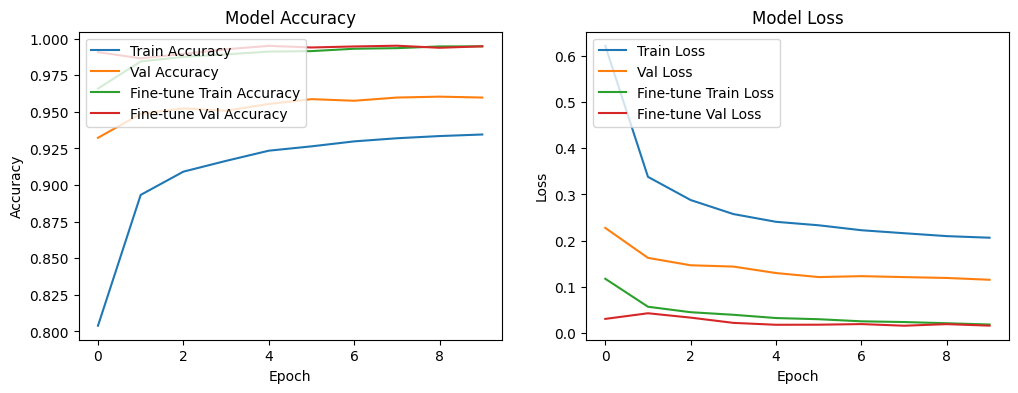

In [24]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.plot(history_fine.history['accuracy'], label='Fine-tune Train Accuracy')
plt.plot(history_fine.history['val_accuracy'], label='Fine-tune Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.plot(history_fine.history['loss'], label='Fine-tune Train Loss')
plt.plot(history_fine.history['val_loss'], label='Fine-tune Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.show()